In [1]:
import numpy as np
#import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text file into dataframe

In [2]:
path = "G:\My Drive\Python_data_classes\projects_after_GA\obj_det_automl\yoloToPascalvoc\data"

In [3]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [9]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]
images_name = [x for x in os.listdir(path) if x.endswith('.jpeg')]

In [10]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

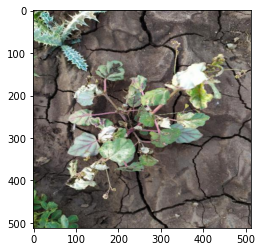

In [6]:
#checking our conversion is working or not
#plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [12]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for num, id in enumerate(tqdm(images)):
    #print(id)
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    #print(label)
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = images_name[num]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|██████████| 1300/1300 [00:16<00:00, 79.07it/s]


In [17]:
df.head(25)

,image_name,object,x_cen,y_cen,w,h
0,agri_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125
1,agri_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906
2,agri_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766
3,agri_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328
4,agri_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703
5,agri_0_1026.jpeg,0,0.496094,0.411133,0.503906,0.494141
6,agri_0_1028.jpeg,0,0.476562,0.285156,0.070312,0.0625
7,agri_0_1028.jpeg,0,0.480469,0.169922,0.054688,0.082031
8,agri_0_1028.jpeg,0,0.148438,0.235352,0.070312,0.091797
9,agri_0_1028.jpeg,0,0.420898,0.489258,0.064453,0.041016


In [15]:
df['object'].value_counts()

0    1212
1     860
Name: object, dtype: int64

# Converting dataframe into Pascal-voc format

In [18]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [20]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|██████████| 2072/2072 [00:01<00:00, 1328.22it/s]


In [21]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_1009.jpeg,512,512,weed,172,119,449,391
1,agri_0_1017.jpeg,512,512,weed,8,4,500,390
2,agri_0_1018.jpeg,512,512,weed,20,84,434,409
3,agri_0_1020.jpeg,512,512,weed,66,23,440,336
4,agri_0_1024.jpeg,512,512,weed,161,76,453,381
...,...,...,...,...,...,...,...,...
2067,agri_0_9963.jpeg,512,512,weed,58,80,455,336
2068,agri_0_9971.jpeg,512,512,weed,45,132,228,311
2069,agri_0_9971.jpeg,512,512,weed,52,355,227,512
2070,agri_0_9971.jpeg,512,512,weed,272,80,458,310


# Visualizing labels

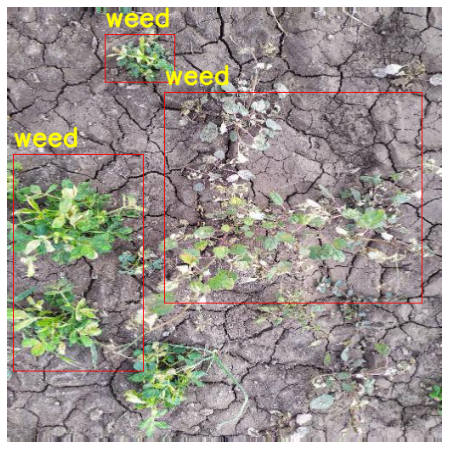

In [12]:
# any_index_number = 55 #change this number for different images
# test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
# test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
# for i in range(len(test_df)):
    
#     rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
#     text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
# plt.figure(figsize=(8,8))    
# plt.imshow(text)
# plt.axis('off')
# plt.show()

# Saving label file

In [22]:

pascal_voc.to_csv('pascal_voc_format.csv',index=False)